## Sampling methods

### Generate random number from different distributions

In [37]:
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# generating uniform random variables
unif_list = stats.uniform.rvs(size = 1000)
print(type(unif_list))

<class 'numpy.ndarray'>


In [29]:
norm = stats.norm
norm.pdf(0)

0.3989422804014327

### Inverse Transform sampling
Example: sampling from an exponential distribution.
For $X \sim exp(\lambda)$, the CDF is F(x) = $1-e^{-\lambda x}$. The technique is to to sampling values of $ u = F(x) $ from a uniform distribution, and then work backward to derive value of x for such u. So $x = F^{-1}(u) = - \frac{1}{\lambda} \ln(1-u) $

In [35]:
def inverse_exp_cdf(u, lambda_val = 1):
    return -1/lambda_val * np.log(1-u)

unif_samples = stats.uniform.rvs(size = 1000)
exp_samples = inverse_exp_cdf(unif_samples)

In [70]:
### let's look at the bar chart of the samples
### divide the values into bins using numpy histogram
def plot_samples(samples, bins=100):
    rang = samples.max() - samples.min()
    width = rang / bins
    hist, bin_edges = np.histogram(samples, bins=bins)
    if bins <= 100:
        print(hist)
        print(bin_edges)
    ### actually draw the plot using pyplot bar chart
    plt.bar(bin_edges[:-1], hist, width=width) # excluding the last element to equate the number of bins
    plt.xlim(min(bin_edges), max(bin_edges))

[66 64 62 54 46 31 46 41 40 31 36 18 38 30 27 22 18 22 20 16 14 14 14 19
 13 10 15 12  7  7 11 12  4  6 10  6  6  8  5  7  6  9  0  4  3  2  1  4
  3  3  6  4  2  1  1  2  2  0  2  1  0  2  1  1  2  0  0  0  1  0  0  1
  0  0  0  0  0  2  0  1  1  0  1  0  0  1  0  0  1  0  0  0  0  0  0  0
  0  0  0  1]
[5.00209465e-04 6.89769859e-02 1.37453762e-01 2.05930539e-01
 2.74407315e-01 3.42884092e-01 4.11360868e-01 4.79837644e-01
 5.48314421e-01 6.16791197e-01 6.85267974e-01 7.53744750e-01
 8.22221526e-01 8.90698303e-01 9.59175079e-01 1.02765186e+00
 1.09612863e+00 1.16460541e+00 1.23308218e+00 1.30155896e+00
 1.37003574e+00 1.43851251e+00 1.50698929e+00 1.57546607e+00
 1.64394284e+00 1.71241962e+00 1.78089640e+00 1.84937317e+00
 1.91784995e+00 1.98632673e+00 2.05480350e+00 2.12328028e+00
 2.19175705e+00 2.26023383e+00 2.32871061e+00 2.39718738e+00
 2.46566416e+00 2.53414094e+00 2.60261771e+00 2.67109449e+00
 2.73957127e+00 2.80804804e+00 2.87652482e+00 2.94500160e+00
 3.01347837e+00 3.08195

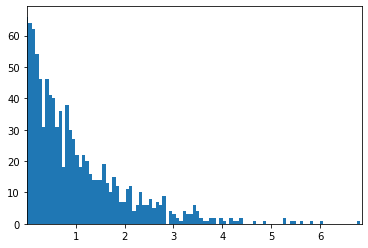

In [71]:
### try ploting with 100 bins
plot_samples(exp_samples)

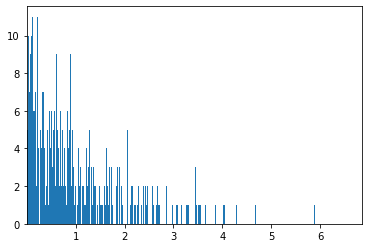

In [72]:
### try ploting with more refined bins
plot_samples(exp_samples, bins=1000)

### Rejection sampling